<a href="https://colab.research.google.com/github/RMDircio/DS-Unit-1-Sprint-2-Statistics/blob/master/Regina%20Dircio%20DSPT5%20-%20Sampling%20Confidence%20Intervals%20and%20Hypothesis%20Testing%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


*******************************************************

## Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
from scipy.stats import ttest_ind, ttest_1samp, chisquare, normaltest, stats, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Clean up data


In [0]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/'

In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime',
                          'duty-free','south-africa']

In [4]:
voting_df=pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
print(voting_df.shape)
voting_df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [5]:
# replace 'y' and 'n' with 1 and 0
# make df numeric

voting_df=voting_df.replace({'y':1, 'n':0})
print(voting_df.shape)
voting_df.dropna(how='any', inplace=True)
print(voting_df.shape)
voting_df

(435, 17)
(232, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,democrat,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
426,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
427,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [6]:
# create a democrat subset df

democrat_df = voting_df[voting_df['party'] == 'democrat']
print(democrat_df.shape)
democrat_df.head()

(124, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [7]:
# create a republican subset df

republican_df = voting_df[voting_df['party'] == 'republican']
print(republican_df.shape)
republican_df.head()


(108, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


Generate and numerically represent a confidence interval

In [0]:
# define function
# standard deviation for population
# standard error for sample of population

def confidence_interval(data, confidence=0.95):


    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = np.array(data)
    data_mean = np.mean(data)
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1+ confidence)/2, n-1) #look up corresonding tstat
    return (data_mean, data_mean - moe, data_mean + moe)

In [9]:
republican_CI = confidence_interval(republican_df['immigration'])

AttributeError: ignored

Graphically (with a plot) represent the confidence interval

In [0]:
# from Robert Sharp
# plotting the confidence interval

def plot_confidence_interval(data, confidence= 0.95):
  sns.kdeplot(data)
  CI = confidence_interval(data, confidence)
  plt.axvline(x=CI[1], color='red')  # confidence interval
  plt.axvline(x=CI[0], color='k')    # sample mean is black line
  plt.axvline(x=CI[2], color= 'red') # confidence interval
  plt.show()
  
# 95% confident that the population mean is inbetween the red lines

## Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [11]:
# Read in the titanic dataset
# Get only categorical data
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

boat_df = pd.read_csv(url)
boat_df.describe(exclude='number')

,Sex,Embarked
count,712,712
unique,2,3
top,male,Southampton
freq,453,554


In [12]:
# crosstab
boat_xtable = pd.crosstab(boat_df['Sex'], boat_df['Embarked'], margins=True)
boat_xtable

Embarked,Cherbourg,Queenstown,Southampton,All
Sex,,,,
female,61,12,186,259
male,69,16,368,453
All,130,28,554,712


In [13]:
# create a set of female counts
# get by calling only 1 row

f_count = boat_xtable.iloc[0][0:3]  #[row][which:columns]
f_count

Embarked
Cherbourg       61
Queenstown      12
Southampton    186
Name: female, dtype: int64

In [14]:
# get f_counts as an array 

f_count = boat_xtable.iloc[0][0:3].values
f_count

array([ 61,  12, 186])

In [15]:
# create a set of male counts

m_count = boat_xtable.iloc[1][0:6]  #[row][which:columns]
m_count

Embarked
Cherbourg       69
Queenstown      16
Southampton    368
All            453
Name: male, dtype: int64

In [16]:
# get m_counts as an array 

m_count = boat_xtable.iloc[1][0:3].values
m_count

array([ 69,  16, 368])

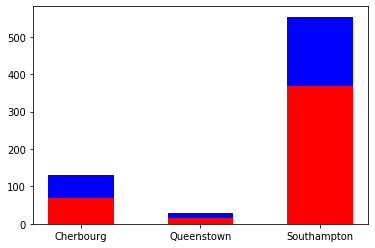

In [17]:

# category labels
label_names = ['Cherbourg', 'Queenstown', 'Southampton']

#Plots the bar chart
pl = plt.bar(label_names, m_count, 0.55, color='r')
p2 = plt.bar(label_names, f_count, 0.55, color='b', bottom= m_count)

Chi-Squared Statistic with Numpy

In [32]:
# get observed data

observed = pd.crosstab(boat_df['Sex'], boat_df['Embarked']).values
observed

array([[ 61,  12, 186],
       [ 69,  16, 368]])

In [20]:
# get expected data

# Get the row summeries
row_sums = boat_xtable.iloc[0:2,3].values # [row.start:row.end, which single column]
print(row_sums)
# get comlumn summeries
column_sums = boat_xtable.iloc[2, 0:3].values # [single row, all columns]
print(column_sums)

[259 453]
[130  28 554]


In [21]:
# get the total useing loc not iloc
total = boat_xtable.loc['All', 'All']
total

712

In [0]:
# what are the expected values

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in column_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

In [23]:
# what does the expected distribution look like?

print(expected[0]) # row 0 the female row
print(expected[1]) # row 1 the male row

[ 47.28932584  10.18539326 201.5252809 ]
[ 82.71067416  17.81460674 352.4747191 ]


In [24]:
# does expected match observed? no
boat_xtable

Embarked,Cherbourg,Queenstown,Southampton,All
Sex,,,,
female,61,12,186,259
male,69,16,368,453
All,130,28,554,712


In [25]:
# finally chi squared

chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

8.635939718372466

In [26]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1) #using the sample data not population

dof = (len(row_sums)-1)*(len(column_sums)-1)
dof

2

## Run a $\chi^{2}$ Test using Scipy

In [27]:
stats.chi2_contingency(observed)
# (chi squared stat, pvalue, degree of freedom, array of expected values)

AttributeError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)